In [26]:
import numpy as np
from matplotlib import pyplot as plt

Define the problem parameters. 


In [27]:
A = np.array([[1, 3], [3, 1]]) # low dimensions to plot it, you can test larger sizes
b = np.zeros(2)

lmbda = 0.5


The function to be minimized is $\frac{1}{2}\|Ax-b\|_2^2 + \lambda \|x\|_1$

In [28]:
f = lambda x: 0.5 * np.sum((A @ x - b) ** 2) + lmbda * np.sum(np.abs(x))

# derivative of f from matrix calculus
df = lambda x: A.T @ (A @ x) - A.T @ b


Plot the function

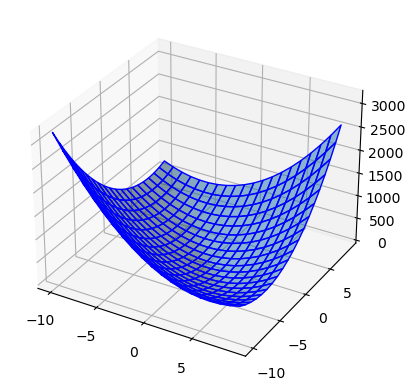

In [29]:
# this function has been prepared only for the visualization sake, no need to go through this but it renders some nice
# graphics :)
F = lambda r1, r2: (r1 * A[0, 0] + r2 * A[0, 1] - b[0]) ** 2 + (r1 * A[1, 0] + r2 * A[1,1] - b[1]) ** 2 + lmbda * (np.abs(r1) + np.abs(r2))
xx, yy = np.meshgrid(np.arange(-10, 10, 1), np.arange(-10, 10, 1))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, F(xx, yy), edgecolor=[0, 0, 1], alpha=0.5, facecolor=[0, 1, 1])

Parameters of ISTA

In [30]:
TOL_GRAD_NORM = 1e-4
MAX_ITER = 1e3
TOL_DIST_X = 1e-3
alpha = 0.05
# optimal value for alpha
alpha = 1 / np.max(np.linalg.eigvals(A.T@A))

Initialization: test different inizializations, the function is convex, you always converge to the same solution

In [31]:
x = np.array([-5, 10])

grad_norm = 1e10
distanceX = 1e10

# initialize the list with all the estimates
all_x = [x]


In [32]:
def soft_thresholding(x, lmbda):
    for i in range(len(x)):
        if x[i] > lmbda:
            x[i] -= lmbda
        elif x[i] < -lmbda:
            x[i] += lmbda
        else:
            x[i] = 0
    return x

Main loop

In [33]:
cnt = 0

while cnt < MAX_ITER and distanceX > TOL_DIST_X:

  # compute the argument of the proximal operator
  x = x - alpha * df(x) 

  cnt += 1

  # perform soft thresholding of x
  x = soft_thresholding(x, lmbda)

  # compute the distance between two consecutive iterates for the stopping criteria
  distanceX = np.linalg.norm(all_x[-1] - x)

  # store the estimate
  all_x.append(x)


Plot all the estimates

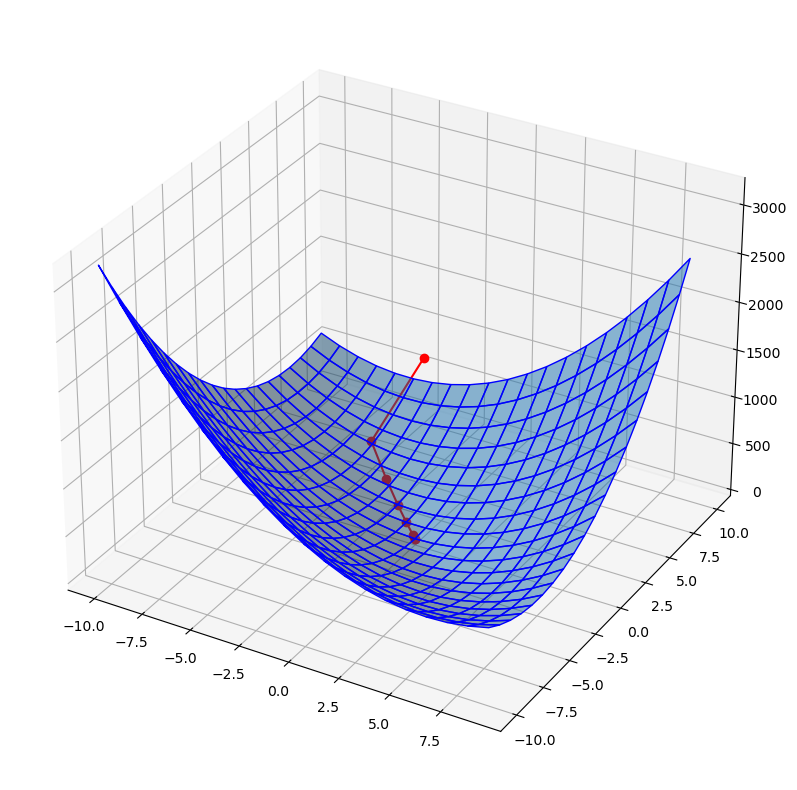

In [34]:
# plot the new estimate
xxplot = [x[0] for x in all_x]
yyplot = [x[1] for x in all_x]
zzplot = F(np.array(xxplot), np.array(yyplot))

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, F(xx, yy), edgecolor=[0, 0, 1], alpha=0.5, facecolor=[0, 1, 1])
ax.plot3D(xxplot, yyplot, zzplot, 'r-o')

In [35]:
print(f'nr of iteration of ISTA (before stopping criteria met): {cnt}\n')
print(f'Solution of ISTA: [{x[0]:.4f}, {x[1]:.4f}]\n')
print(f'Value of the functional: {f(x):.4f}\n')

nr of iteration of ISTA (before stopping criteria met): 7

Solution of ISTA: [0.0000, 0.0000]

Value of the functional: 0.0000

